<a href="https://colab.research.google.com/github/mahendra204/Machine-Learning/blob/main/Concept_of_LinearRegression_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

housing_train_data=pd.read_csv("/content/sample_data/california_housing_train.csv")

In [3]:
housing_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Text(0, 0.5, 'total_bedrooms')

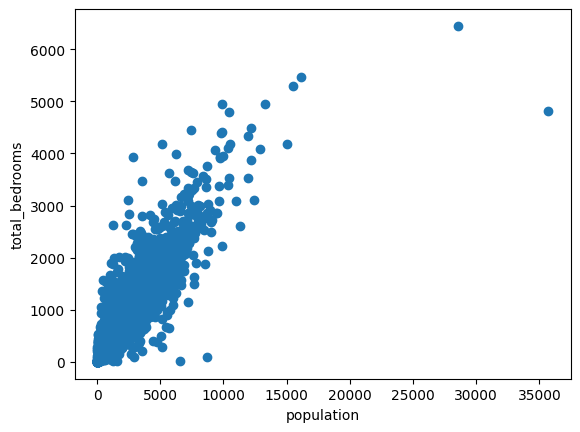

In [6]:
population=housing_train_data['population']
bedrooms=housing_train_data['total_bedrooms']
plt.scatter(population, bedrooms)
plt.xlabel('population')
plt.ylabel('total_bedrooms')

In [11]:
population_data=population.to_numpy()
bedrooms_data= bedrooms.to_numpy()
population_data.shape,bedrooms_data.shape

((17000,), (17000,))

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(population_data.reshape((17000,1)), bedrooms_data)
sklearn_bedroom_predictions= model.predict(population_data.reshape((17000,1)))
sklearn_bedroom_predictions.shape


(17000,)

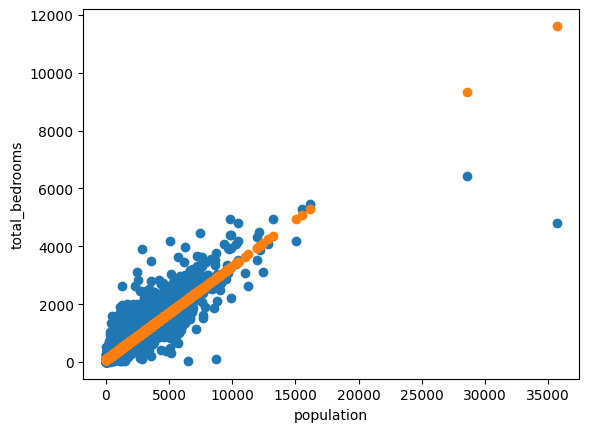

In [25]:
population=housing_train_data['population']
bedrooms=housing_train_data['total_bedrooms']
plt.scatter(population, bedrooms)
plt.xlabel('population')
plt.ylabel('total_bedrooms')

plt.scatter(population, sklearn_bedroom_predictions)

#plt.scatter(population, sklearn_bedroom_predictions)

In [26]:
predictions= pd.DataFrame({'population': population_data,
                           'bedrooms': bedrooms_data,
                           'sklearn_bedroom_predictions': sklearn_bedroom_predictions})

In [27]:
predictions

,population,bedrooms,sklearn_bedroom_predictions
0,1015.0,1283.0,405.266668
1,1129.0,1901.0,442.153776
2,333.0,174.0,184.591162
3,515.0,337.0,243.481106
4,624.0,326.0,278.750359
...,...,...,...
16995,907.0,394.0,370.320987
16996,1194.0,528.0,463.185899
16997,1244.0,531.0,479.364455
16998,1298.0,552.0,496.837296


In [34]:
# total_bedrooms[i] = (m*population[i])+ c +error
# y[i] = mx+c +error --------> straight line equation passing through certain point
# model: y^[i] = (m^ * x[i])+ c^

def get_predictions(model, xinput):
  #model= {'c^': [number], 'm^': [number] }
  #xinput: np.array of floats with shape (n) of inputs

  #returns: np.array of floats with shape(n,)
  a = model['c^']
  b = model['m^']
  return a+ b* xinput

In [42]:
test_model= {'c^': 1,'m^': 0.5 }
test_x = np.array([1,4,3])
get_predictions(test_model, test_x)

array([1.5, 3. , 2.5])

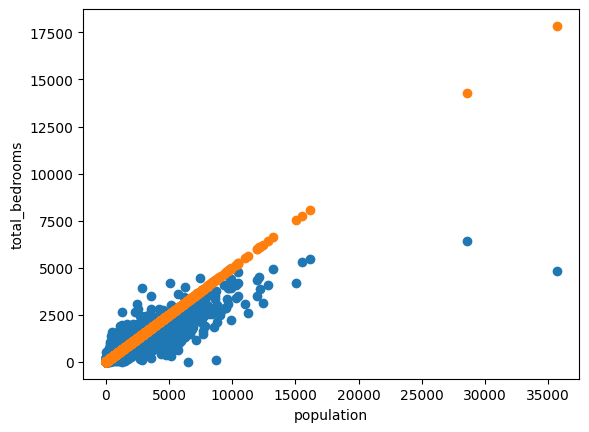

In [43]:
population=housing_train_data['population']
bedrooms=housing_train_data['total_bedrooms']
plt.scatter(population, bedrooms)
plt.xlabel('population')
plt.ylabel('total_bedrooms')


plt.scatter(population, get_predictions(test_model, population_data))

In [47]:
def mean_squared_error(y, y_pred):
  '''
  returns the mean squared error given the ovserved and predicted outputs.
  y: np.array of floats with shape(n,) of observed outputs.
  y_pred: np.array of floats withshape(n,) of predicted outputs
  returns: float representing the MSE.
  '''
  return np.sum(np.square(y-y_pred))/len(y_pred)
def mean_abs_error(y, y_pred):
  '''
  returns the mean absolute error given the ovserved and predicted outputs.
  y: np.array of floats with shape(n,) of observed outputs.
  y_pred: np.array of floats withshape(n,) of predicted outputs
  returns: float representing the MSE.'''
  return np.sum(np.abs(y-y_pred))/len(y_pred)




In [48]:
MSE = mean_squared_error(get_predictions(test_model, population_data), bedrooms)

In [49]:
MSE

111830.7436617647

In [51]:
MAE = mean_abs_error(get_predictions(test_model,population_data), bedrooms)

In [52]:
MAE

213.45373529411765

In [55]:
RMSE=np.sqrt(MSE)

In [56]:
RMSE

334.4110399818832

In [59]:
predictions['our model prediction'] = get_predictions(test_model,population_data)
predictions

,population,bedrooms,sklearn_bedroom_predictions,our model prediction
0,1015.0,1283.0,405.266668,508.5
1,1129.0,1901.0,442.153776,565.5
2,333.0,174.0,184.591162,167.5
3,515.0,337.0,243.481106,258.5
4,624.0,326.0,278.750359,313.0
...,...,...,...,...
16995,907.0,394.0,370.320987,454.5
16996,1194.0,528.0,463.185899,598.0
16997,1244.0,531.0,479.364455,623.0
16998,1298.0,552.0,496.837296,650.0
